In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

#ignore warnings
import warnings
#set the warnings filter to ignore FutureWarning
warnings.simplefilter(action='ignore', category = FutureWarning)

In [ ]:
#import data
insurance = pd.read_csv('/content/insurance.csv')

In [ ]:
#view of the dataframe
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#shape of the data
insurance.shape

(1338, 7)

In [ ]:
#info of the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Distribution of the plot**
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.

**distplot**
The **distplot()** function provides the most convenient way to take a quick look at univariate distribution. This function will plot a histogram that fits the **kernel density estimation(KDE)** of the data.

Now let's plot the histogram of **Number of the persons according to their age**.

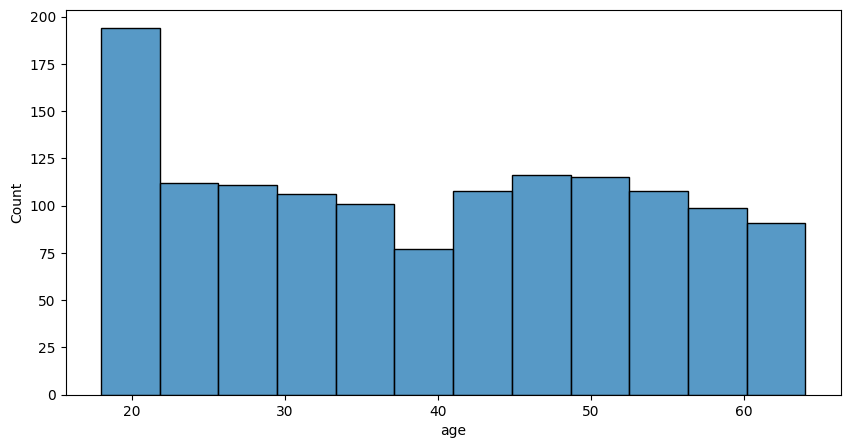

In [ ]:
#histplot
sns.histplot(insurance['age'], kde = False)
plt.show()

Now let's plot the histogram of Number of the charges.

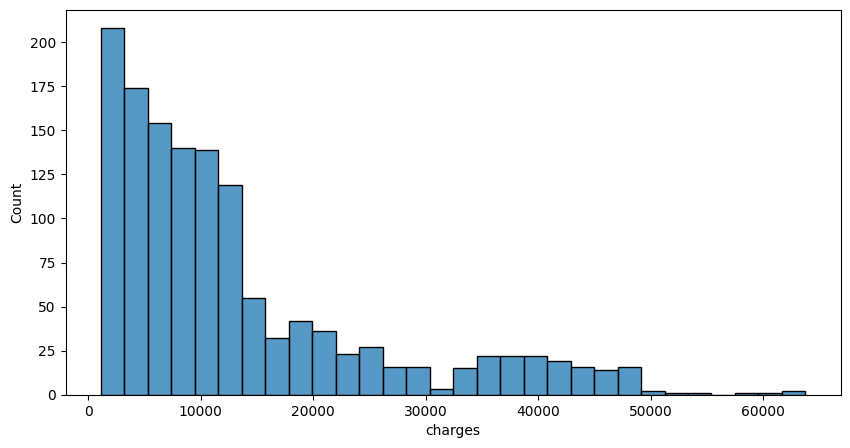

In [ ]:
sns.histplot(insurance['charges'], kde=False)
plt.show()

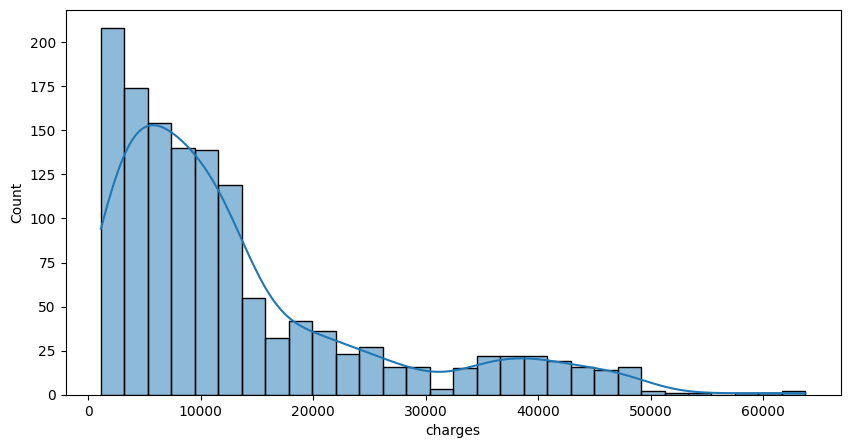

In [ ]:
sns.histplot(insurance['charges'], kde=True)
plt.show()

In [ ]:
insurance['log_charge'] = np.log2(insurance['charges'])

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charge
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


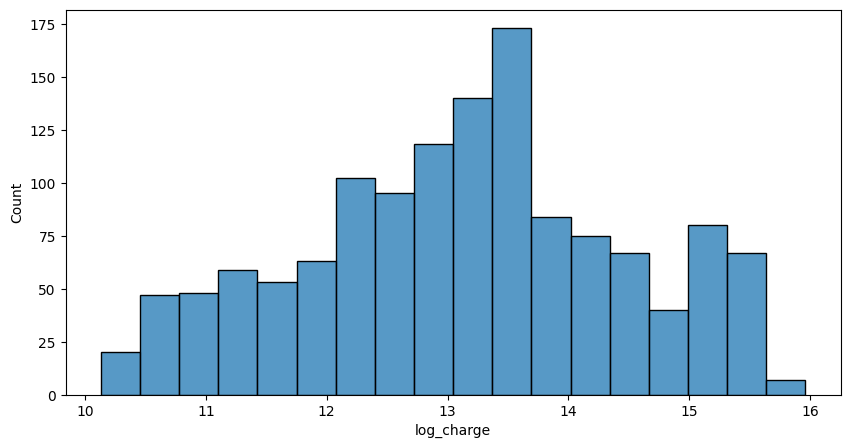

In [ ]:
sns.histplot(insurance['log_charge'])
plt.show()

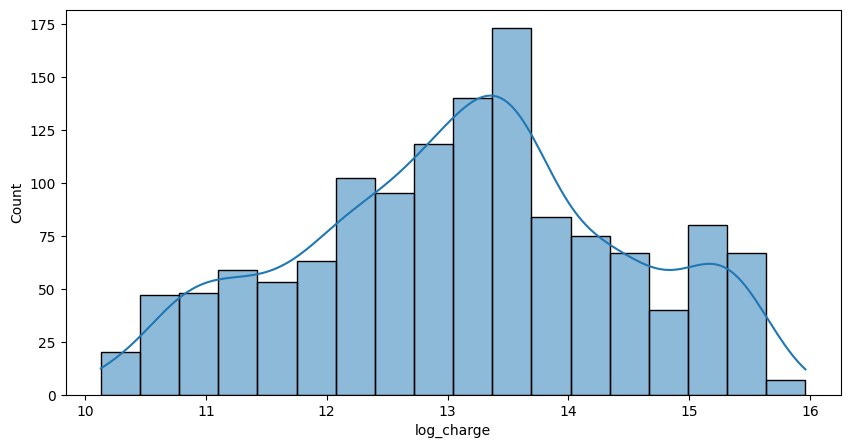

In [ ]:
sns.histplot(insurance['log_charge'], kde=True)
plt.show()

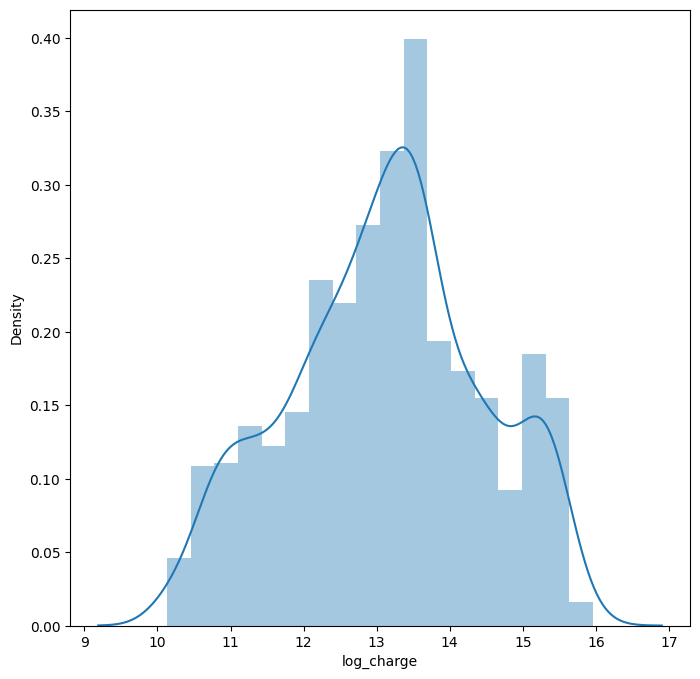

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(insurance['log_charge'])
plt.show()

<a id = "Relational"></a>
## Relational plots

<a id = "relplot"></a>
### relplot
Figure-level interface for drawing relational plots onto a FacetGrid.

The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The `relplot()` function has a convenient `kind` parameter to let you easily switch to this alternate representation.


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   log_charge  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


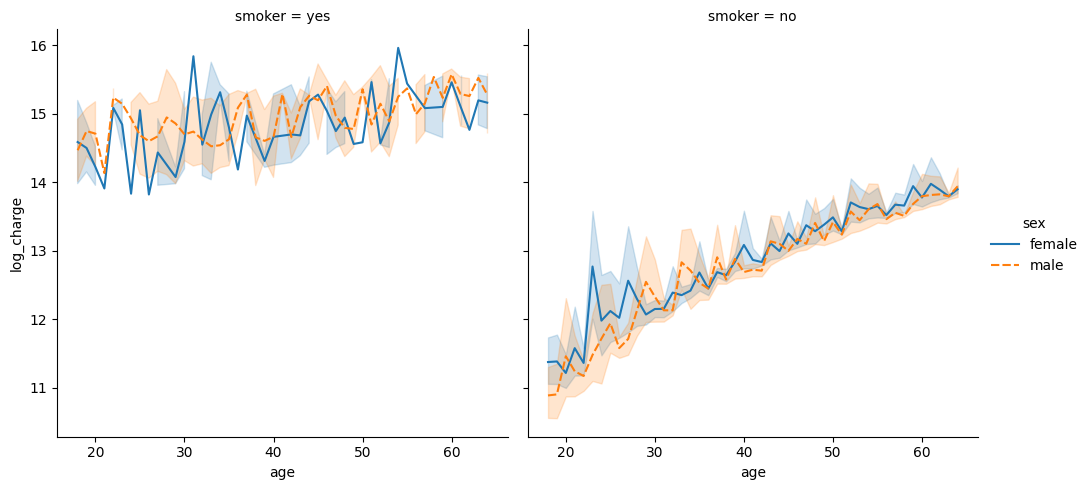

In [ ]:
sns.relplot(x="age", y="log_charge", col="smoker", hue="sex", style="sex",kind="line", data=insurance) # scatter can be used instead of "line" plot
plt.show()

## **Scatterplot**

**Scatter Plot** is the most convenient way to visualize the distribution where each observation is represented in two dimensional plot via x and y axis.

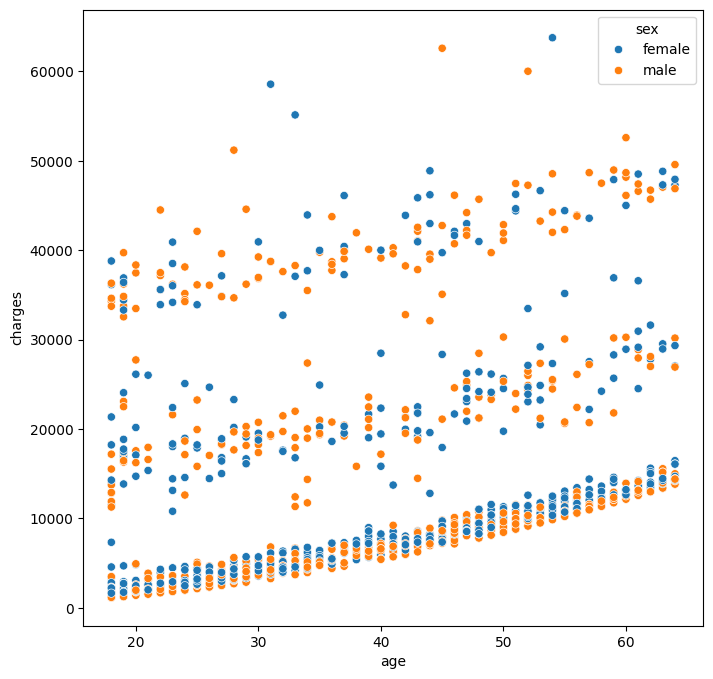

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='age', y = 'charges', hue='sex', data = insurance)
plt.show()

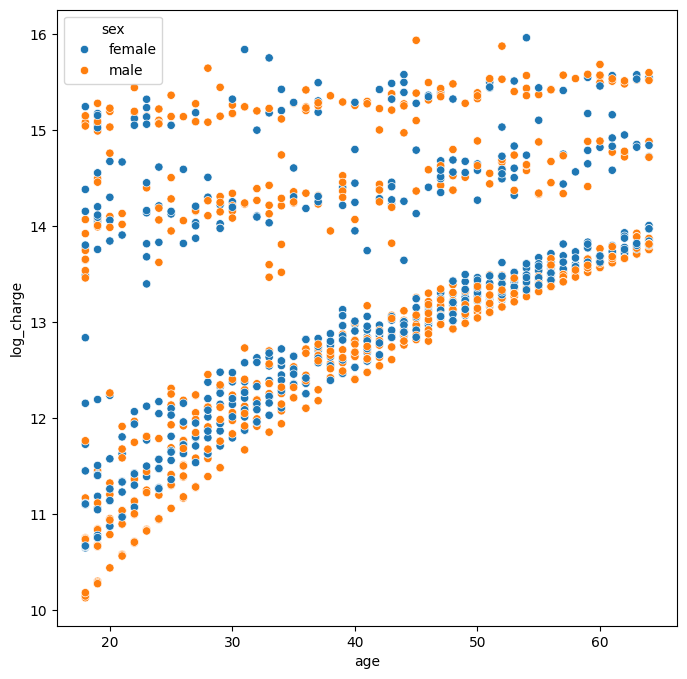

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='age', y = 'log_charge', hue='sex', data = insurance)
plt.show()

<a id = "lineplot"></a>
### lineplot
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets of the data using the `hue, size`, and `style` parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both **hue** and **style** for the same variable) can be helpful for making graphics more accessible.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent **“numeric” or “categorical”** data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular **“ticks”** with values that may or may not exist in the data. This behavior can be controlled through various parameters.

By default, the plot aggregates over multiple `y` values at each value of `x` and shows an estimate of the central tendency and a confidence interval for that estimate.


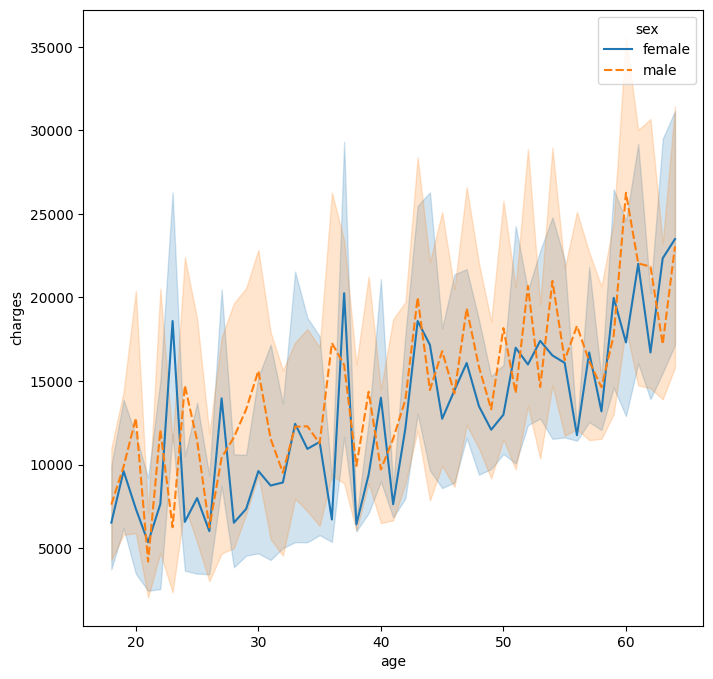

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x='age', y='charges', hue = 'sex', style = 'sex', data = insurance)
plt.show()

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "features"></a>
## Categorical Plot
When one or both the variables under study are categorical, we use plots like `striplot(), swarmplot(), etc,`. Seaborn provides interface to do so.
<a id = "barplot"></a>
### barplot
***The `barplot()` shows the relation between a categorical variable and a continuous variable.*** The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category.
**Bar plot** represents the estimate of ***central tendency.***

**Note:** don't confuse **Bar plot** and **Histogram**. Please back to `distplot` section to see the difference.

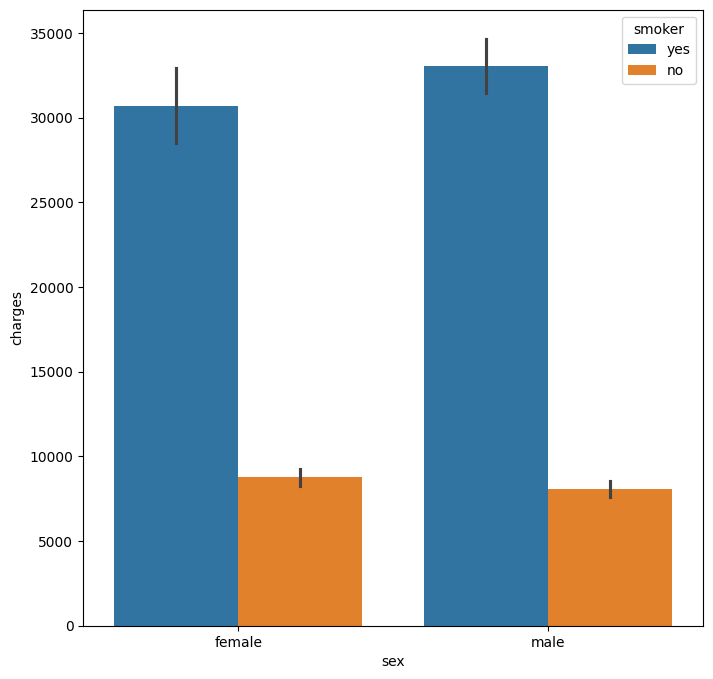

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='sex', y='charges', hue='smoker', data=insurance)
plt.show()

In [ ]:
#to seprate numeric data
numeric_data = insurance.select_dtypes(np.number)
numeric_data

,age,bmi,children,charges,log_charge
0,19,27.900,0,16884.92400,14.043448
1,18,33.770,1,1725.55230,10.752842
2,28,33.000,3,4449.46200,12.119415
3,33,22.705,0,21984.47061,14.424197
4,32,28.880,0,3866.85520,11.916945
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,13.371851
1334,18,31.920,0,2205.98080,11.107205
1335,18,36.850,0,1629.83350,10.670509
1336,21,25.800,0,2007.94500,10.971504


In [ ]:
#to correlation between -1 to 1 with numeric data
corr = numeric_data.corr()
corr

,age,bmi,children,charges,log_charge
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charge,0.527834,0.132669,0.161336,0.892964,1.000000


a[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Matrix"></a>
## Matrix plots

<a id = "heatmap"></a>
### heatmap

Visualizing data with **heatmaps** is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

Now let's plot the correlation matrix of our data with a heatmap.

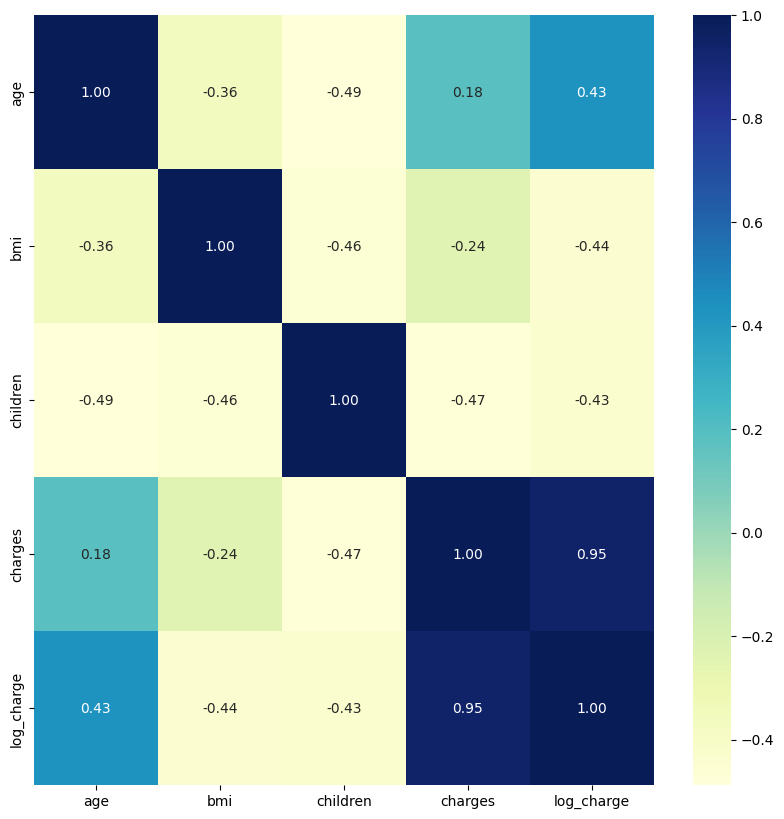

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr.corr(), cmap = 'YlGnBu', annot = True, fmt ='.2f')
plt.show()

In [44]:
#individual show the correlation chargs feature info
corr['charges']

age           0.299008
bmi           0.198341
children      0.067998
charges       1.000000
log_charge    0.892964
Name: charges, dtype: float64

In [45]:
#now separte the categorical data
cat_data = insurance.select_dtypes('O')
cat_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [46]:
# Now, we create Predictor for input x
predictor = ['age', 'bmi']

**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

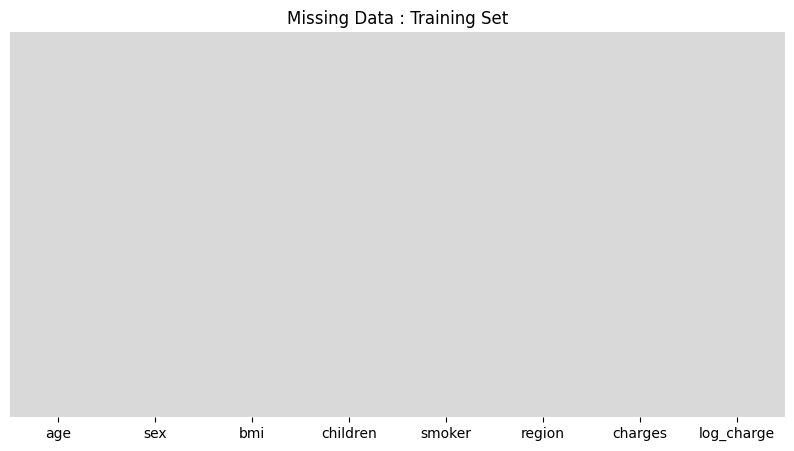

In [47]:
#Heatmap
sns.heatmap(insurance.isnull(), yticklabels = False, cbar = False, cmap = 'tab20c_r')
plt.title('Missing Data : Training Set')
plt.show()

## **Boxplot**
Now, we use **BoxPlot** grouped by sex for log_charges to check variation for useful insight of the data for prediction of target variable

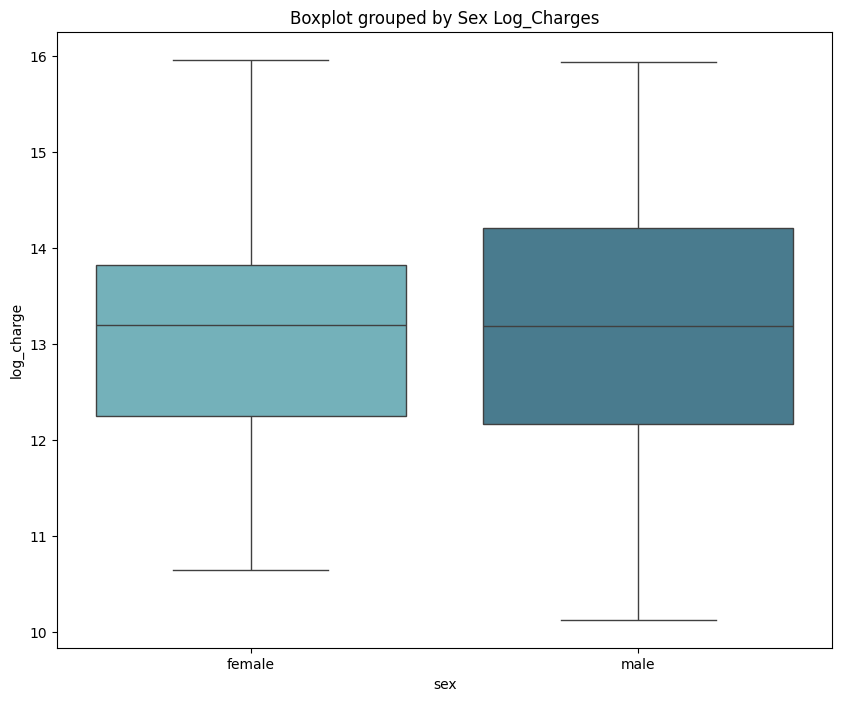

In [55]:
#Here's we plot Boxplot grouped by sex log_charges
plt.figure(figsize = (10, 8))
sns.boxplot(x ="sex", y ='log_charge', hue = 'sex', data =insurance, palette = 'GnBu_d')
plt.title('Boxplot grouped by Sex Log_Charges')
plt.show()

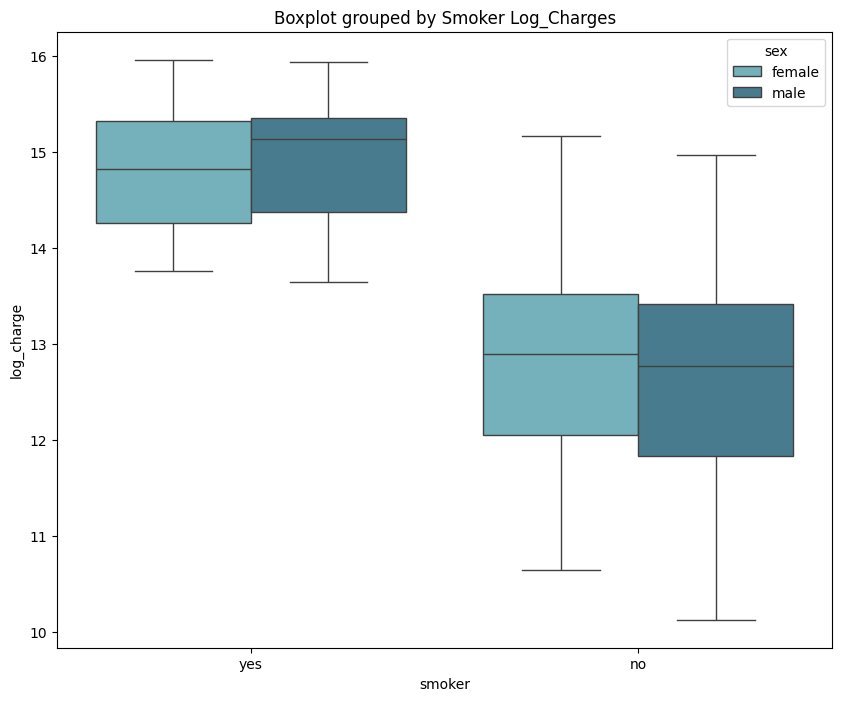

In [56]:
#Here's we plot Boxplot grouped by smoker log_charges
plt.figure(figsize = (10, 8))
sns.boxplot(x ="smoker", y ='log_charge', hue = 'sex', data =insurance, palette = 'GnBu_d')
plt.title('Boxplot grouped by Smoker Log_Charges')
plt.show()

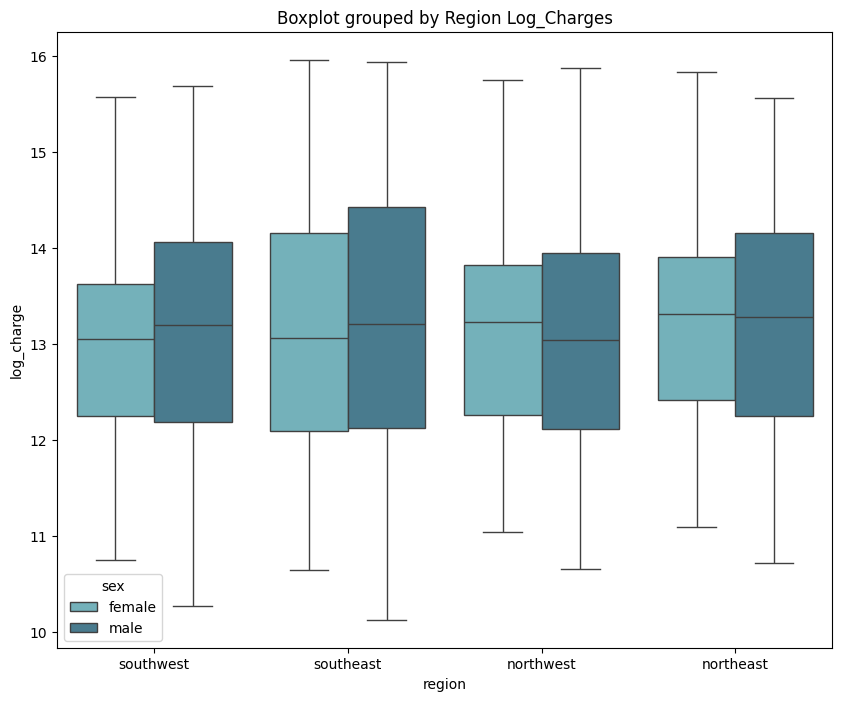

In [57]:
#Here's we plot Boxplot grouped by region log_charges
plt.figure(figsize = (10, 8))
sns.boxplot(x ="region", y ='log_charge', hue = 'sex', data =insurance, palette = 'GnBu_d')
plt.title('Boxplot grouped by Region Log_Charges')
plt.show()

Hence, here's we predict according to BoxPlot grouped to check variation for useful insight of the data for prediction of target variable is **Smoker Log_Charges**

### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Becuase with preparing data the machine learning algorithm will not be able to take in those features as inputs.

In [58]:
insurance['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [59]:
insurance['smoker'] == 'yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [60]:
#to create new feature / column in the dataset
insurance['is_smoker'] = insurance['smoker'] == 'yes'

In [61]:
#to check data with first few rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charge,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
1,18,male,33.770,1,no,southeast,1725.55230,10.752842,False
2,28,male,33.000,3,no,southeast,4449.46200,12.119415,False
3,33,male,22.705,0,no,northwest,21984.47061,14.424197,False
4,32,male,28.880,0,no,northwest,3866.85520,11.916945,False


In [62]:
#Now we found another predictor for training our model than we append it in predictor list
predictor.append('is_smoker')
predictor

['age', 'bmi', 'is_smoker']

In [72]:
#Assign or create input x feature for model trainig
x = insurance[predictor]
print(x.shape)
x.head()

(1338, 3)


,age,bmi,is_smoker
0,19,27.900,True
1,18,33.770,False
2,28,33.000,False
3,33,22.705,False
4,32,28.880,False


In [73]:
#Assign or create output / target variable y feature for model trainig
y = insurance['log_charge']
print(y.shape)
y.head()

(1338,)


0    14.043448
1    10.752842
2    12.119415
3    14.424197
4    11.916945
Name: log_charge, dtype: float64

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [74]:
#import data split model for machine learning training
from sklearn.model_selection import train_test_split

#split the data as input and output for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=101)

In [78]:
#x_train shape
print(x_train.shape)

#x_train / input data shows first few rows after split the data into four chunks
x_train.head()

(1003, 3)


,age,bmi,is_smoker
1091,55,29.830,False
367,42,24.985,False
300,36,27.550,False
647,40,23.370,False
1257,54,27.645,False


In [79]:
#y_train shape
print(x_train.shape)

#y_train / output data shows first few rows after split the data into four chunks
y_train.head()

(1003, 3)


1091    13.462315
367     12.968858
300     12.719975
647     13.010578
1257    13.464793
Name: log_charge, dtype: float64

In [80]:
#testing data shape
print(x_test.shape)

#testing data shows first few rows
x_test.head()

(335, 3)


,age,bmi,is_smoker
44,38,37.050,False
134,20,28.785,False
980,54,25.460,False
618,19,33.110,True
1238,37,22.705,False


In [81]:
#testing data shape
print(y_test.shape)

#testing data shows first few rows
y_test.head()

(335,)


44      12.569778
134     11.262806
980     14.639178
618     15.071791
1238    12.770149
Name: log_charge, dtype: float64

# **Linear Regression**

## **Model Training**

In [82]:
# import model
from sklearn.linear_model import LinearRegression

print("Linear Regression")
#create instance of the model
lin_reg = LinearRegression()

#Pass training data into model
lin_reg.fit(x_train, y_train)

Linear Regression


LinearRegression()

## **Model Evaluation**

## **Linear Regression**

In [87]:
#import model
from sklearn.metrics import mean_squared_error, r2_score

#Prediction of y
y_predict = lin_reg.predict(x_test)

#score of Mean Squared Error
print("Linear Regression")
print("__"*15)
mse = round(mean_squared_error(y_predict, y_test) *100,2)
r2score = round(r2_score(y_predict, y_test) *100,2)
print('Mean Squared Error: ',mse,"%")
print('r2 Score: ',r2score,"%")

Linear Regression
______________________________
Mean Squared Error:  40.51 %
r2 Score:  64.43 %
